In [1]:
import pandas as pd

In [22]:
ev = pd.read_csv('/Users/anasophia/projetos-do-bootcamp-analise-de-dados-enap-2023/analise_da_evasao_estudantil/Dados/dataset_grad_pres.csv', engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [4]:
ev.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM'],
      dtype='object')

In [23]:
ev.shape

(64540, 19)

In [24]:
display(ev.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

,Contagem Nulos
ANO_INGRESSO,0
AREA,0
CAMPUS,0
COTA,2713
CURSO_NOME,0
ETNIA,2208
LAT,2047
LAT_ORGM,22561
LNG,2047
LNG_ORGM,22561


In [25]:
display(ev.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())

,Contagem Unicos
ANO_INGRESSO,16
AREA,7
CAMPUS,2
COTA,14
CURSO_NOME,77
ETNIA,6
LAT,1453
LAT_ORGM,1341
LNG,1336
LNG_ORGM,1224


In [11]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64540 entries, 0 to 64539
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO_INGRESSO       64540 non-null  int64 
 1   SEMESTRE_INGRESSO  64540 non-null  int64 
 2   TIPO_INGRESSO      64540 non-null  object
 3   COTA               61827 non-null  object
 4   CURSO_NOME         64540 non-null  object
 5   AREA               64540 non-null  object
 6   SITUACAO           64540 non-null  object
 7   MOTIVO_SAIDA       64540 non-null  object
 8   CAMPUS             64540 non-null  object
 9   TURNO              64540 non-null  object
 10  ETNIA              62332 non-null  object
 11  SEXO               64540 non-null  object
 12  TIPOCURSO          64540 non-null  object
 13  LNG                62493 non-null  object
 14  LAT                62493 non-null  object
 15  LOCAL              64540 non-null  object
 16  LNG_ORGM           41979 non-null  objec

In [26]:
ev['MOTIVO_SAIDA'].unique()

array(['A Especificar', 'Abandono', 'Conclusão', 'Abandono/2ª Mod/Hab',
       'Mudança de Curso', 'Desistência', 'Cancelamento',
       'Aluno sem matrícula', 'Transferência', 'CALOURO SEM RENDIMENTO',
       'Desligamento', 'Desistencia2ªMod/Hab', 'Jubilamento',
       'Transferencia Port. 230/07 MEC', 'Falecimento',
       'Perda de Vínculo', 'Jubilamento 2a modalidade', 'Liminar Cassada',
       'Outro'], dtype=object)

In [27]:
ev['MOTIVO_SAIDA'].value_counts()

MOTIVO_SAIDA
A Especificar                     22415
Conclusão                         22120
Abandono                           8468
Desistência                        7617
Cancelamento                       1091
Mudança de Curso                    830
CALOURO SEM RENDIMENTO              624
Jubilamento                         451
Desligamento                        444
Transferência                       149
Aluno sem matrícula                 120
Abandono/2ª Mod/Hab                  92
Jubilamento 2a modalidade            51
Falecimento                          19
Desistencia2ªMod/Hab                 16
Perda de Vínculo                     10
Outro                                10
Liminar Cassada                       9
Transferencia Port. 230/07 MEC        4
Name: count, dtype: int64

In [28]:
colunas = ['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO']

t1 = ev[colunas].copy()

In [38]:
import matplotlib.pyplot as plt

In [75]:
t1 = ev.loc[ev['SITUACAO'] == 'Evadido']

In [76]:
t2 = t1['CURSO_NOME'].value_counts()

In [77]:
t2.head()

CURSO_NOME
CIÊNCIAS EXATAS                                     2173
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS    1883
CIÊNCIAS ECONÔMICAS                                  922
BACHARELADO INTERDISCIPLINAR EM ARTES E DESIGN       839
ADMINISTRAÇÃO                                        826
Name: count, dtype: int64

In [44]:
import seaborn as sns

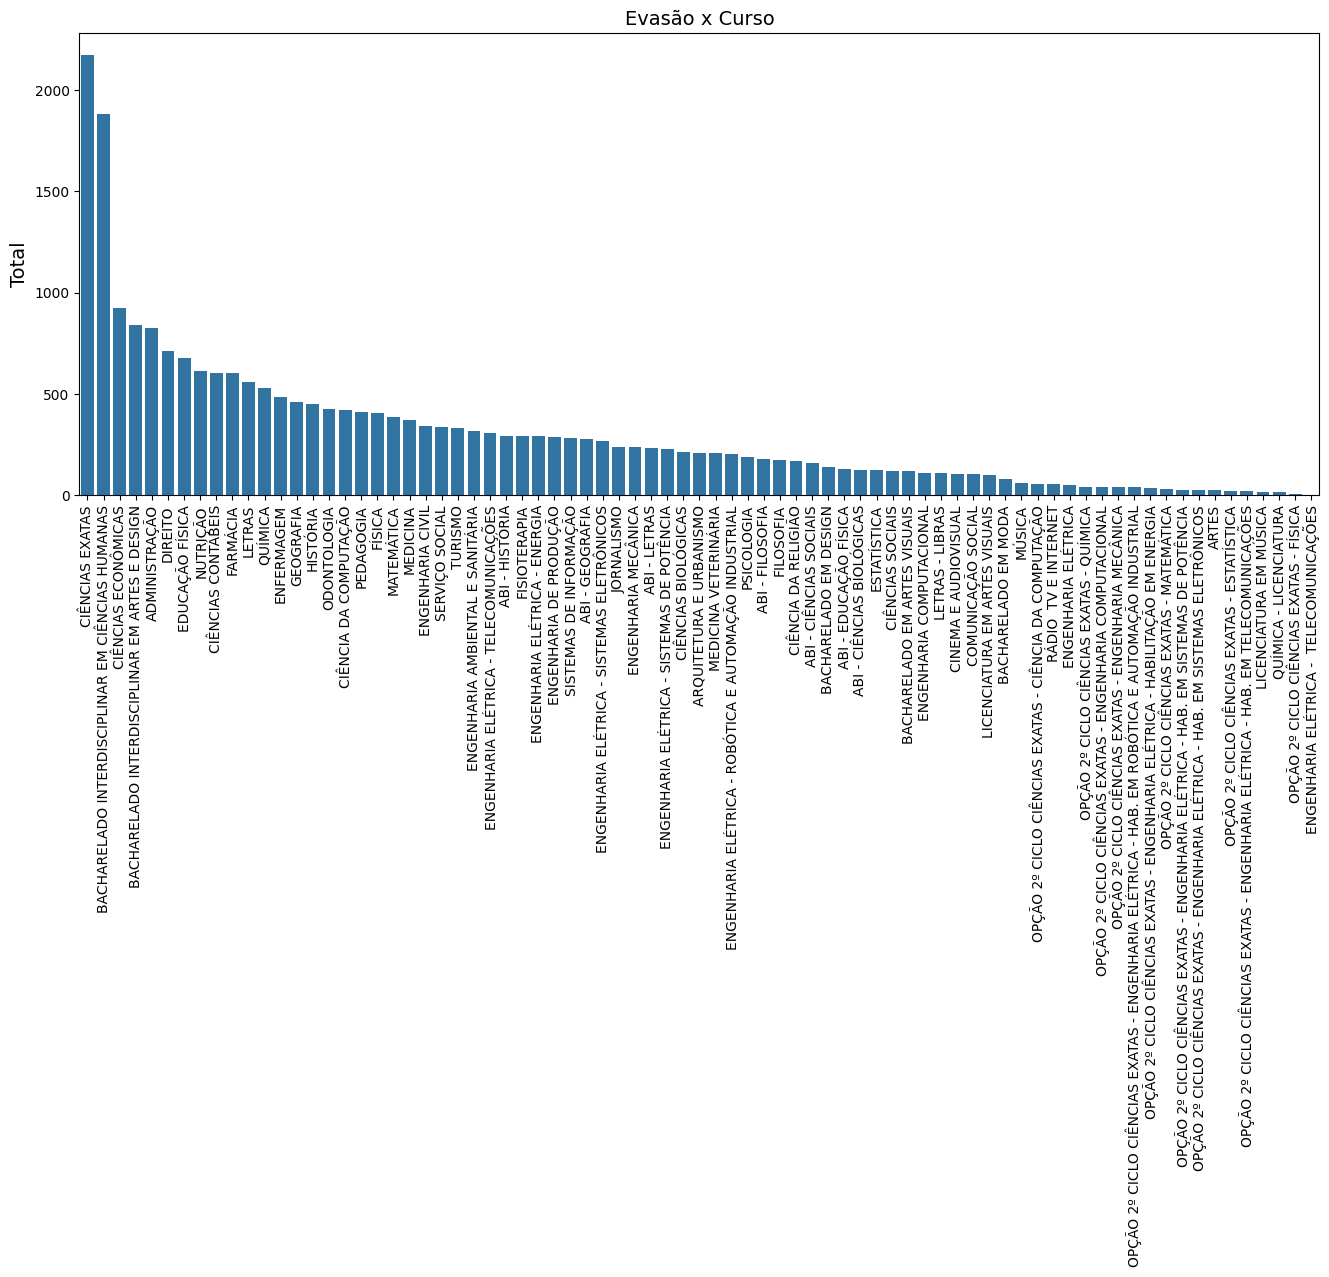

In [78]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=t2.index, 
                y=t2)

axes.set_title('Evasão x Curso', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [82]:
t3 = t1.loc[(t1['CURSO_NOME'] == 'CIÊNCIAS EXATAS')]

In [83]:
t4 = t3['MOTIVO_SAIDA'].value_counts()

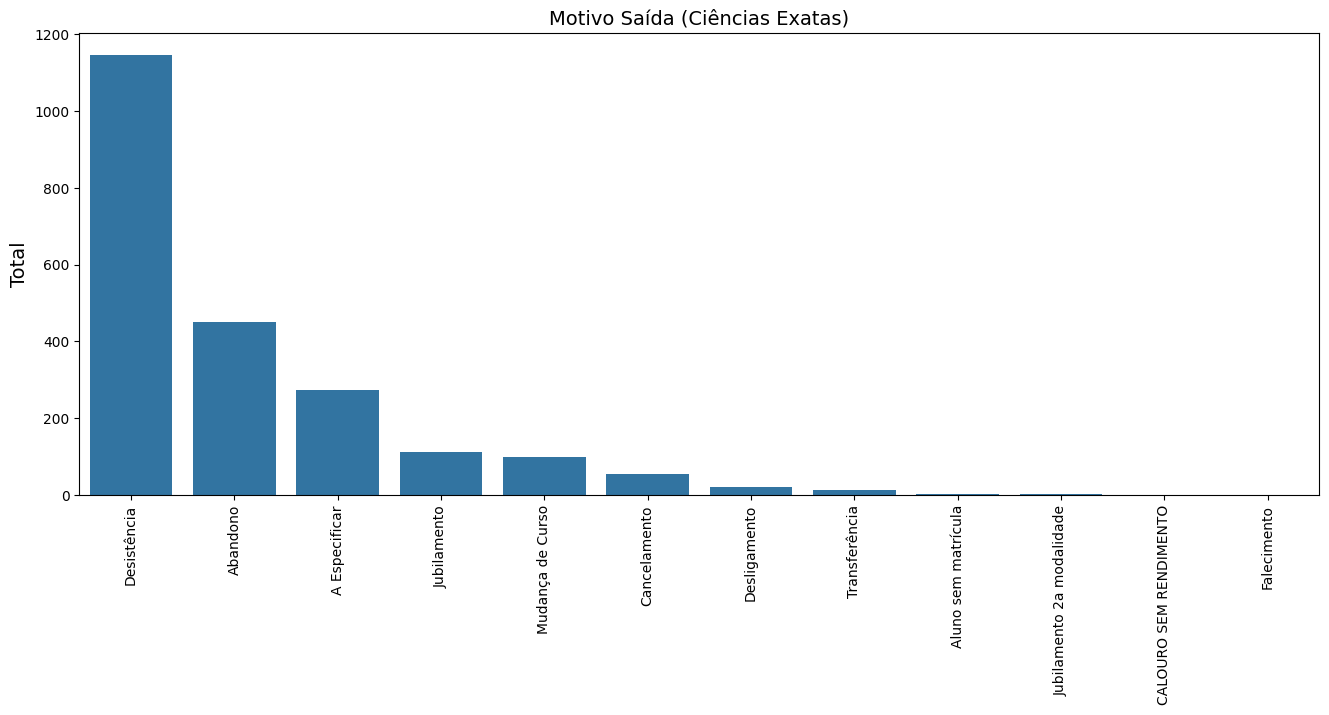

In [84]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=t4.index, 
                y=t4)

axes.set_title('Motivo Saída (Ciências Exatas)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [85]:
t5 = t3['COTA'].value_counts()

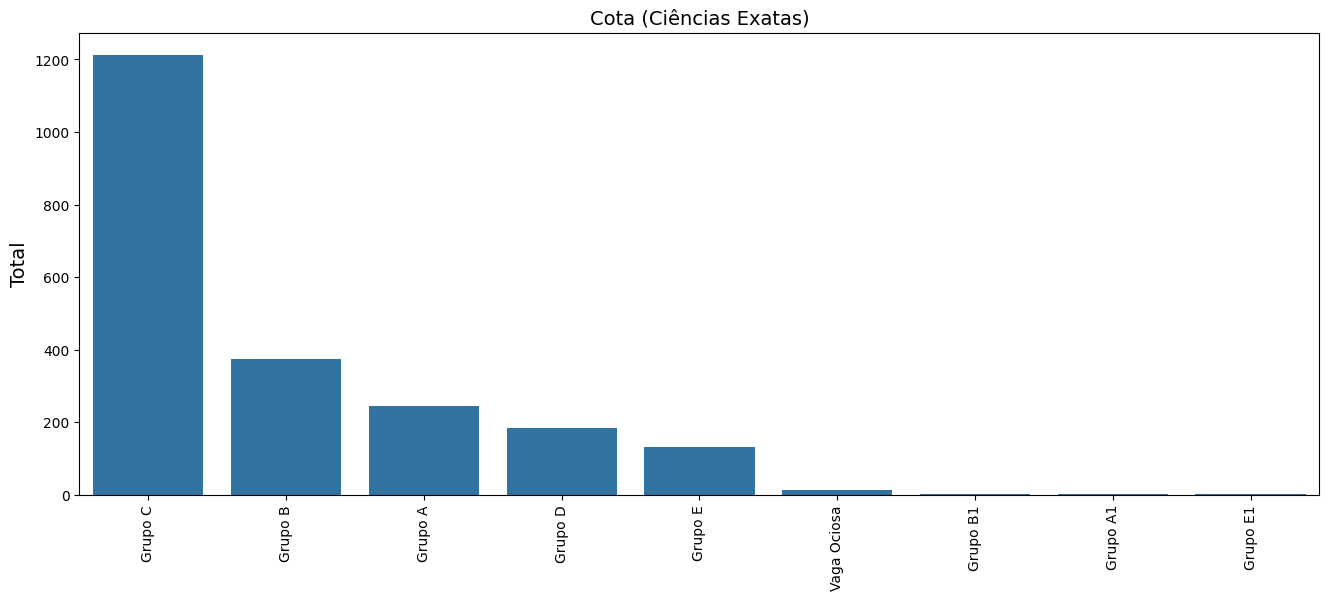

In [86]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=t5.index, 
                y=t5)

axes.set_title('Cota (Ciências Exatas)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

## Conhecendo os grupos:

* **Grupo A:** candidatos com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas;
* **Grupo A1:** candidatos com deficiência com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas;
* **Grupo B:** candidatos com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de outra declaração;
* **Grupo B1:** candidatos com deficiência com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de outra declaração;
* **Grupo C:** vagas de ampla concorrência, independentemente de renda ou de escola;
* **Grupo D:** candidatos que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas, independentemente de renda;
* **Grupo D1:** candidatos com deficiência que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas, independentemente de renda;
* **Grupo E:** candidatos que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de renda ou autodeclaração;
* **Grupo E1:** candidatos com deficiência que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de renda ou autodeclaração.